In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Exercise 6.3
A = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [0.5, 0.5, 0]])

In [3]:
B = A - np.identity(3)
B

array([[-1. ,  1. ,  0. ],
       [ 0. , -1. ,  1. ],
       [ 0.5,  0.5, -1. ]])

In [4]:
#Exercise 6.4

def modela(tinit, xinit, tdomain, dt, r, K):
    
    result = [xinit]
    timesteps = [tinit]
    
    while timesteps[-1] <= tdomain:
        x_new = result[-1] + r * result[-1] * (1 - result[-1] / K) * dt
        t_new = timesteps[-1] + dt

        result.append(x_new)
        timesteps.append(t_new)
    
    results = {}
    results['x'] = result
    results['t'] = timesteps
    
    return results   

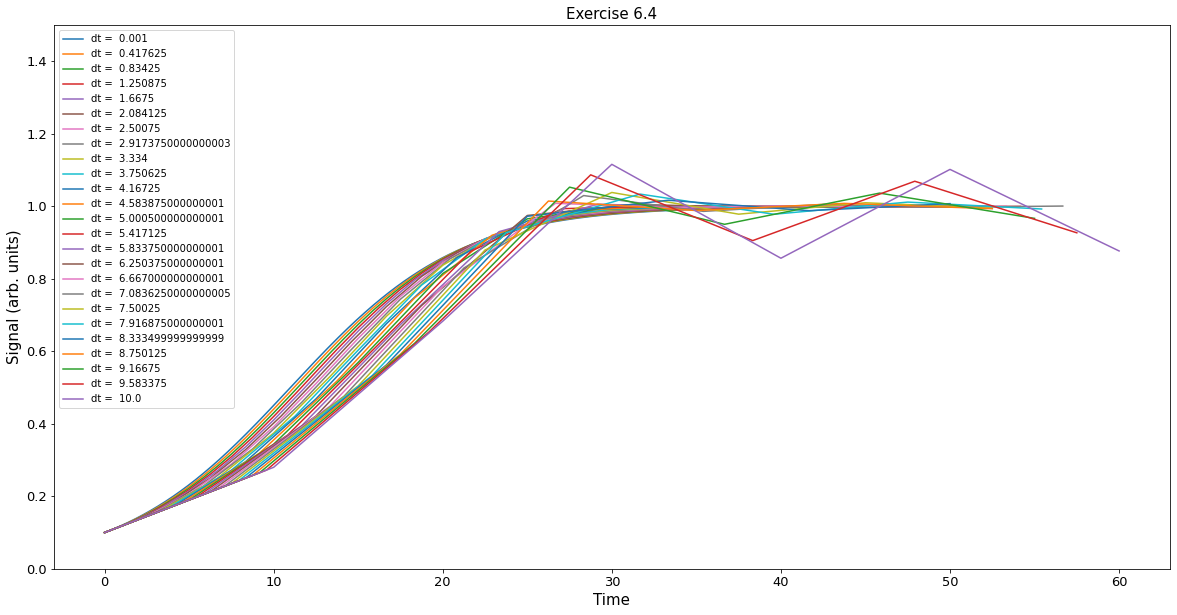

In [5]:
plt.figure(figsize=(20, 10))
for each in np.linspace(0.001, 10, 25):
    run = modela(tinit=0., xinit=0.1, tdomain=50, dt=float(each), r=0.2, K=1.0)
    plt.plot(run['t'], run['x'], label='dt =  ' + str(each))
plt.legend()
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal (arb. units)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Exercise 6.4', fontsize=15)
plt.ylim(0, 1.50)
plt.show()

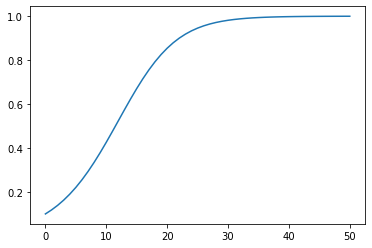

In [6]:
# Code 6.1 from Textbook for comparison
from pylab import *

r = 0.2
K = 1.0
Dt = 1

def initialize():
    global x, result, t, timesteps
    x = 0.1
    result = [x]
    t = 0.
    timesteps = [t]
    
def observe():
    global x, result, t, timesteps
    result.append(x)
    timesteps.append(t)

def update():
    global x, result, t, timesteps
    x = x + r * x * (1 - x / K) * Dt
    t = t + Dt

initialize()
while t < 50.:
    update()
    observe()

plot(timesteps, result)
show()

In [7]:
#Exercise 6.5 (Phase Space)
def modelc(aconst, bconst, cconst, dconst, lower, upper, step):
    param_space = np.arange(lower, upper, step)
    y_range, x_range = param_space, param_space

    X, Y = np.meshgrid(x_range, y_range)
    
    Xdot = (aconst * X) - (bconst * X * Y)
    Ydot = (-1 * cconst * Y) + (dconst * X * Y)

    results = {}

    results['X'] = X
    results['Y'] = Y
    results['Xdot'] = Xdot
    results['Ydot' ] = Ydot

    return results

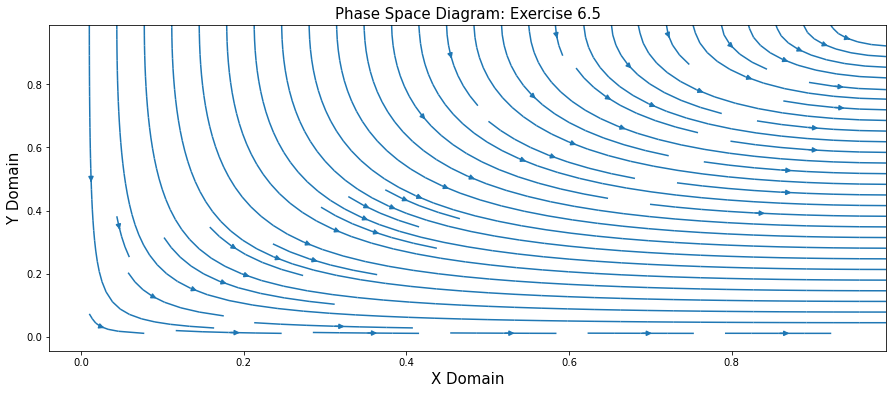

In [8]:
run = modelc(aconst=1, bconst=1, cconst=1, dconst=1, lower=0.01, upper=1, step=0.01)
plt.figure(figsize=(15, 6))
plt.streamplot(run['X'], run['Y'], run['Xdot'], run['Ydot'])
plt.xlabel('X Domain', fontsize=15)
plt.ylabel('Y Domain', fontsize=15)
plt.title('Phase Space Diagram: Exercise 6.5', fontsize=15)
plt.show()

In [9]:
def modeld(aconst, bconst, cconst, dconst, dt, t_not, X_not, Y_not, tdomain):

    t_results = [t_not]
    X_results = [X_not]
    Y_results = [Y_not]

    while t_results[-1] <= tdomain:

        Xdot = (aconst * X_results[-1]) - (bconst * X_results[-1] * Y_results[-1])
        Ydot = (-1 * cconst * Y_results[-1]) + (dconst * X_results[-1] * Y_results[-1])
        nx = X_results[-1]  + Xdot * dt
        ny = Y_results[-1]  + Ydot * dt
        time = t_results[-1] + dt

        t_results.append(time) 
        X_results.append(nx) 
        Y_results.append(ny) 

    results = {}
    results['time'] = t_results
    results['x'] = X_results
    results['y'] = Y_results
    
    return results

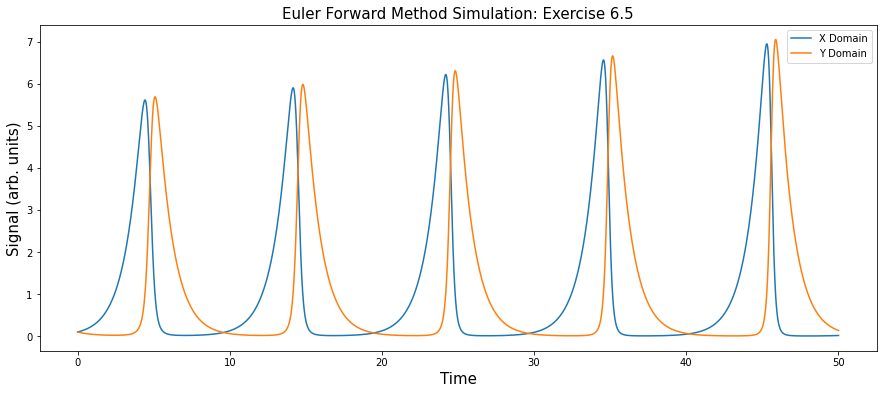

In [10]:
plt.figure(figsize=(15, 6))
run = modeld(aconst=1, bconst=1, cconst=1, dconst=1, dt=0.01, t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
plt.plot(run['time'], run['x'], label='X Domain')
plt.plot(run['time'], run['y'], label='Y Domain')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal (arb. units)', fontsize=15)
plt.title('Euler Forward Method Simulation: Exercise 6.5', fontsize=15)
plt.legend()
plt.show()

Running Step 0 // Value: 0.001
Running Step 1 // Value: 0.002
Running Step 2 // Value: 0.003
Running Step 3 // Value: 0.004
Running Step 4 // Value: 0.005
Running Step 5 // Value: 0.006
Running Step 6 // Value: 0.007
Running Step 7 // Value: 0.008
Running Step 8 // Value: 0.009
Running Step 9 // Value: 0.01


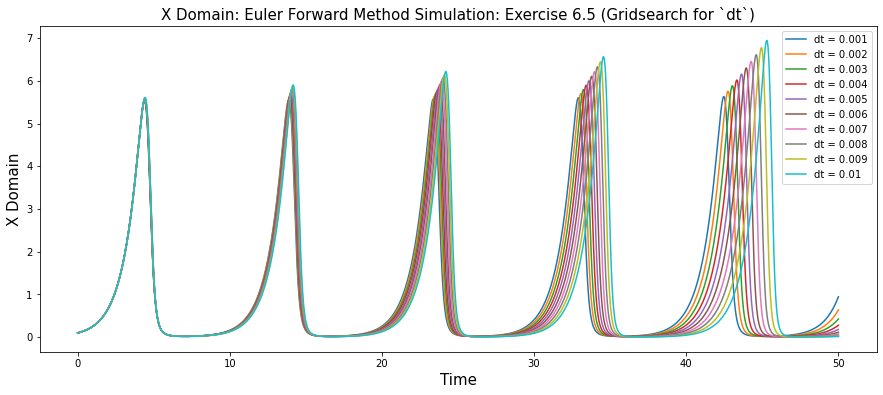

In [11]:
#Grid Search for `dt` plot x domain. 
plt.figure(figsize=(15, 6))
for i, each in enumerate(np.linspace(0.001, 0.01, 10)):
    print('Running Step {} // Value: {}'.format(i, round(each, 3)))
    run = modeld(aconst=1, bconst=1, cconst=1, dconst=1, dt=float(each), t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
    plt.plot(run['time'], run['x'], label='dt = ' + str(round(each, 3)))
plt.xlabel('Time', fontsize=15)
plt.ylabel('X Domain', fontsize=15)
plt.title('X Domain: Euler Forward Method Simulation: Exercise 6.5 (Gridsearch for `dt`)', fontsize=15)
plt.legend()
plt.show()

Running Step 0 // Dt Value: 0.001
Running Step 1 // Dt Value: 0.002
Running Step 2 // Dt Value: 0.003
Running Step 3 // Dt Value: 0.004
Running Step 4 // Dt Value: 0.005
Running Step 5 // Dt Value: 0.006
Running Step 6 // Dt Value: 0.007
Running Step 7 // Dt Value: 0.008
Running Step 8 // Dt Value: 0.009
Running Step 9 // Dt Value: 0.01


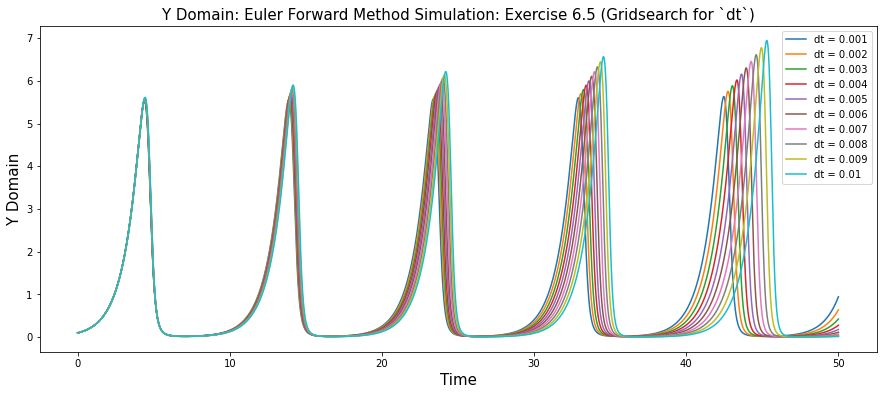

In [12]:
#Grid Search for `dt` plot y domain. 
plt.figure(figsize=(15, 6))
for i, each in enumerate(np.linspace(0.001, 0.01, 10)):
    print('Running Step {} // Dt Value: {}'.format(i, round(each, 3)))
    run = modeld(aconst=1, bconst=1, cconst=1, dconst=1, dt=float(each), t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
    plt.plot(run['time'], run['x'], label='dt = ' + str(round(each, 3)))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Y Domain', fontsize=15)
plt.title('Y Domain: Euler Forward Method Simulation: Exercise 6.5 (Gridsearch for `dt`)', fontsize=15)
plt.legend()
plt.show()

Running Step 0 // Dt Value: 0.001
Running Step 1 // Dt Value: 0.002
Running Step 2 // Dt Value: 0.003
Running Step 3 // Dt Value: 0.004
Running Step 4 // Dt Value: 0.005
Running Step 5 // Dt Value: 0.006
Running Step 6 // Dt Value: 0.007
Running Step 7 // Dt Value: 0.008
Running Step 8 // Dt Value: 0.009
Running Step 9 // Dt Value: 0.01


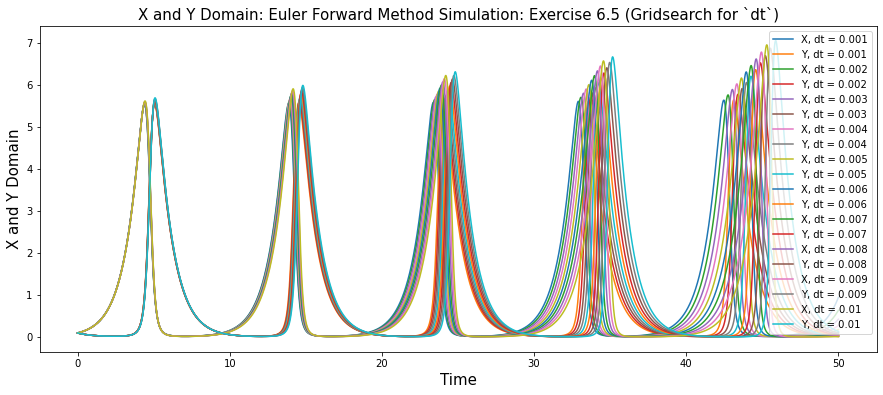

In [13]:
#Grid Search for `dt` plot x and y domain. 
plt.figure(figsize=(15, 6))
for i, each in enumerate(np.linspace(0.001, 0.01, 10)):
    print('Running Step {} // Dt Value: {}'.format(i, round(each, 3)))
    run = modeld(aconst=1, bconst=1, cconst=1, dconst=1, dt=float(each), t_not=0, X_not=0.1, Y_not=0.1, tdomain=50)
    plt.plot(run['time'], run['x'], label='X, dt = ' + str(round(each, 3)))
    plt.plot(run['time'], run['y'], label='Y, dt = ' + str(round(each, 3)))
plt.xlabel('Time', fontsize=15)
plt.ylabel('X and Y Domain', fontsize=15)
plt.title('X and Y Domain: Euler Forward Method Simulation: Exercise 6.5 (Gridsearch for `dt`)', fontsize=15)
plt.legend()
plt.show()